In [0]:
# Assuming the dataset is in CSV format
sales_data = spark.read.csv("/FileStore/datasets/retail_sales_data.csv", header=True, inferSchema=True)


In [0]:
from pyspark.sql.functions import sum

total_sales = sales_data.agg(sum("sales_amount").alias("total_sales"))


In [0]:
top_selling_products = sales_data.groupBy("product_id").agg(sum("sales_amount").alias("total_sales")) \
                                .orderBy("total_sales", ascending=False).limit(10)


In [0]:
from pyspark.sql.functions import year, month

sales_by_month_year = sales_data.withColumn("year", year("timestamp")).withColumn("month", month("timestamp")) \
                                .groupBy("year", "month").agg(sum("sales_amount").alias("total_sales")) \
                                .orderBy("year", "month")


In [0]:
from pyspark.sql.functions import sum, countDistinct

# For identifying top-selling products
top_selling_products = sales_data.groupBy("product_id").agg(sum("sales_amount").alias("total_sales")) \
                                .orderBy("total_sales", ascending=False).limit(10)

# For exploring customer demographics
customer_demographics = sales_data.groupBy("customer_id").agg(countDistinct("transaction_id").alias("num_transactions"))


In [0]:
# Display total sales
total_sales.show()

# Display top-selling products
top_selling_products.show()

# Display sales trends over time
sales_by_month_year.show()

# Display customer demographics
customer_demographics.show()


+------------------+
|       total_sales|
+------------------+
|504452.67000000004|
+------------------+

+----------+------------------+
|product_id|       total_sales|
+----------+------------------+
|        27|15244.169999999998|
|         9|14817.839999999998|
|         2|          14001.26|
|         3|13278.769999999999|
|        43|13136.549999999997|
|        22|          13119.53|
|         8|13014.069999999998|
|        14|12854.049999999997|
|        23|          12661.19|
|        30|          12452.27|
+----------+------------------+

+----+-----+------------------+
|year|month|       total_sales|
+----+-----+------------------+
|2023|    2| 6053.089999999999|
|2023|    3|38978.600000000006|
|2023|    4|43326.609999999986|
|2023|    5| 43839.30999999999|
|2023|    6| 45895.16999999998|
|2023|    7| 54285.00999999997|
|2023|    8| 37576.72000000001|
|2023|    9| 44739.96000000002|
|2023|   10|          39942.26|
|2023|   11| 26317.81999999999|
|2023|   12| 47129.4899999999

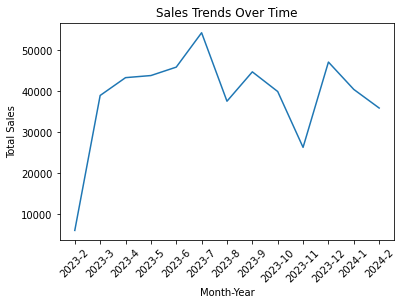

In [0]:
# Visualize sales trends over time
import matplotlib.pyplot as plt

sales_by_month_year_pd = sales_by_month_year.toPandas()
plt.plot(sales_by_month_year_pd["year"].astype(str) + "-" + sales_by_month_year_pd["month"].astype(str), sales_by_month_year_pd["total_sales"])
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.title("Sales Trends Over Time")
plt.xticks(rotation=45)
plt.show()


In [0]:
# Export analysis results to CSV
total_sales.coalesce(1).write.csv("total_sales.csv", header=True)
top_selling_products.coalesce(1).write.csv("top_selling_products.csv", header=True)
sales_by_month_year.coalesce(1).write.csv("sales_by_month_year.csv", header=True)
customer_demographics.coalesce(1).write.csv("customer_demographics.csv", header=True)


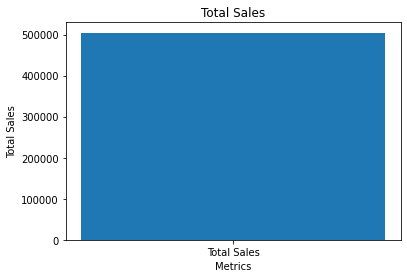

In [0]:
total_sales_pd = total_sales.toPandas()

# Plot total sales
plt.bar(["Total Sales"], total_sales_pd["total_sales"])
plt.xlabel("Metrics")
plt.ylabel("Total Sales")
plt.title("Total Sales")
plt.show()

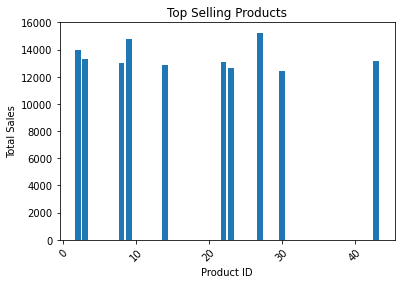

In [0]:
# Convert top_selling_products DataFrame to Pandas
top_selling_products_pd = top_selling_products.toPandas()

# Plot top selling products
plt.bar(top_selling_products_pd["product_id"], top_selling_products_pd["total_sales"])
plt.xlabel("Product ID")
plt.ylabel("Total Sales")
plt.title("Top Selling Products")
plt.xticks(rotation=45)
plt.show()


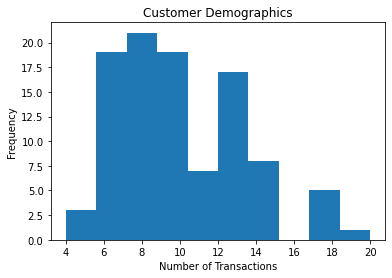

In [0]:
# Convert customer_demographics DataFrame to Pandas
customer_demographics_pd = customer_demographics.toPandas()

# Plot customer demographics
plt.hist(customer_demographics_pd["num_transactions"], bins=10)
plt.xlabel("Number of Transactions")
plt.ylabel("Frequency")
plt.title("Customer Demographics")
plt.show()
